In [1]:
## data 파일 input/target split 8:2

test_input = pd.read_csv("/home/dockeruser/df/project/data/x_test.csv")
test_input = pd.DataFrame(test_input)
test_input = test_input.drop("Unnamed: 0", 1)
train_input = pd.read_csv("/home/dockeruser/df/project/data/x_train.csv")
train_input = pd.DataFrame(train_input)
train_input = train_input.drop("Unnamed: 0", 1)
test_target = pd.read_csv("/home/dockeruser/df/project/data/y_test.csv")
test_target = pd.DataFrame(test_target)
test_target = test_target.drop("Unnamed: 0", 1)
train_target = pd.read_csv("/home/dockeruser/df/project/data/y_train.csv")
train_target = pd.DataFrame(train_target)
train_target = train_target.drop("Unnamed: 0", 1)

In [2]:
train_list = train_input.columns
train_obj_list = train_input.select_dtypes(["object"]).columns

In [3]:
from sklearn.preprocessing import LabelEncoder

train_input_enco = train_input
test_input_enco = test_input

for i in range(len(train_obj_list)):
    house_lb1 = LabelEncoder()
    orig_train = house_lb1.fit_transform(train_input[train_obj_list[i]].values)
    orig_test = house_lb1.fit_transform(test_input[train_obj_list[i]].values)
    train_input_enco[train_obj_list[i]] = orig_train
    test_input_enco[train_obj_list[i]] = orig_test

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1).fit(train_input_enco, train_target)

In [7]:
import StringIO
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

In [8]:
def draw_decision_tree(classifier):
    dot_buf = StringIO.StringIO() 
    export_graphviz(classifier, out_file=dot_buf, feature_names = train_list)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)

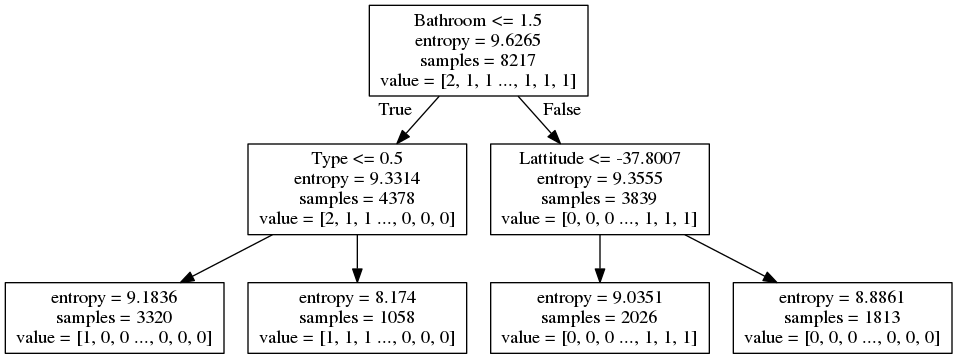

In [9]:
draw_decision_tree(estimator)

In [10]:
## train_input A, B, C, D 나누기

AA = train_input.loc[train_input.Bathroom <= 1.5]
BB = train_input.loc[train_input.Bathroom > 1.5]

A_train_input = AA.loc[train_input.Type <= 0.5]
B_train_input = AA.loc[train_input.Type > 0.5]
C_train_input = BB.loc[train_input.Lattitude <= -37.8007]
D_train_input = BB.loc[train_input.Lattitude > -37.8007]

In [11]:
## test_input A, B, C, D 나누기

aa = test_input.loc[test_input.Bathroom <= 1.5]
bb = test_input.loc[test_input.Bathroom > 1.5]

A_test_input = aa.loc[test_input.Type <= 0.5]
B_test_input = aa.loc[test_input.Type > 0.5]
C_test_input = bb.loc[test_input.Lattitude <= -37.8007]
D_test_input = bb.loc[test_input.Lattitude > -37.8007]

In [12]:
## train_target A, B, C, D 나누기

AAAA = train_target.loc[train_input.Bathroom <= 1.5]
BBBB = train_target.loc[train_input.Bathroom > 1.5]

A_train_target = AAAA.loc[train_input.Type <= 0.5]
B_train_target = AAAA.loc[train_input.Type > 0.5]
C_train_target = BBBB.loc[train_input.Lattitude <= -37.8007]
D_train_target = BBBB.loc[train_input.Lattitude > -37.8007]

In [13]:
## test_target A, B, C, D 나누기

aaaa = test_target.loc[test_input.Bathroom <= 1.5]
bbbb = test_target.loc[test_input.Bathroom > 1.5]

A_test_target = aaaa.loc[test_input.Type <= 0.5]
B_test_target = aaaa.loc[test_input.Type > 0.5]
C_test_target = bbbb.loc[test_input.Lattitude <= -37.8007]
D_test_target = bbbb.loc[test_input.Lattitude > -37.8007]

In [14]:
from sklearn.linear_model import LinearRegression

regressorA = LinearRegression()
regressorA.fit(A_train_input,A_train_target)

regressorB = LinearRegression()
regressorB.fit(B_train_input,B_train_target)

regressorC = LinearRegression()
regressorC.fit(C_train_input,C_train_target)

regressorD = LinearRegression()
regressorD.fit(D_train_input,D_train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
A_pred = regressorA.predict(A_test_input)
B_pred = regressorB.predict(B_test_input)
C_pred = regressorC.predict(C_test_input)
D_pred = regressorD.predict(D_test_input)

In [16]:
A_test_index = []
B_test_index = []
C_test_index = []
D_test_index = []

for i in range(len(test_input_enco)):
    if test_input_enco["Bathroom"][i] < 1.5:
        if test_input_enco["Type"][i] <= 0.5:
            A_test_index.append(i)
        else:
            B_test_index.append(i)
    else:
        if test_input_enco["Lattitude"][i] <= -37.8007:
            C_test_index.append(i)
        else:
            D_test_index.append(i)

In [17]:
k, RErr_A = 0, 0
for i in A_test_index:
    RErr_A += ( (A_pred[k] - A_test_target["Price"][i] )/ A_test_target["Price"][i] )
    k += 1
RErr_A = RErr_A/ len(A_test_target)

In [18]:
k, RErr_B = 0, 0
for i in B_test_index:
    RErr_B += ( (B_pred[k] - B_test_target["Price"][i] )/ B_test_target["Price"][i] )
    k += 1
RErr_B = RErr_B / len(B_test_target)

In [19]:
k, RErr_C = 0, 0
for i in C_test_index:
    RErr_C += ( (C_pred[k] - C_test_target["Price"][i] )/ C_test_target["Price"][i] )
    k += 1
RErr_C = RErr_C/ len(C_test_target)

In [20]:
k, RErr_D = 0, 0
for i in D_test_index:
    RErr_D += ( (D_pred[k] - D_test_target["Price"][i] )/ D_test_target["Price"][i] )
    k += 1
D_test_target = D_test_target / len(D_test_target)

In [21]:
# Score It
from sklearn import metrics

print('A_MAE:',metrics.mean_absolute_error(A_test_target,A_pred))
print('A_MSE:',metrics.mean_squared_error(A_test_target,A_pred))
print('A_RMSE:',np.sqrt(metrics.mean_squared_error(A_test_target,A_pred)))
print()

print('B_MAE:',metrics.mean_absolute_error(B_test_target,B_pred))
print('B_MSE:',metrics.mean_squared_error(B_test_target,B_pred))
print('B_RMSE:',np.sqrt(metrics.mean_squared_error(B_test_target,B_pred)))
print()

print('C_MAE:',metrics.mean_absolute_error(C_test_target,C_pred))
print('C_MSE:',metrics.mean_squared_error(C_test_target,C_pred))
print('C_RMSE:',np.sqrt(metrics.mean_squared_error(C_test_target,C_pred)))
print()

print('D_MAE:',metrics.mean_absolute_error(D_test_target,D_pred))
print('D_MSE:',metrics.mean_squared_error(D_test_target,D_pred))
print('D_RMSE:',np.sqrt(metrics.mean_squared_error(D_test_target,D_pred)))

A_MAE: 231118.804591
A_MSE: 173426666733.0
A_RMSE: 416445.274595

B_MAE: 115918.207964
B_MSE: 24593248164.4
B_RMSE: 156822.345871

C_MAE: 449677.065391
C_MSE: 390843186173.0
C_RMSE: 625174.524571

D_MAE: 1109986.52086
D_MSE: 1.37521327887e+12
D_RMSE: 1172694.87884


In [ ]:
# Actual v predictions scatter
plt.figure(figsize=(8, 8))
ax = plt.gca(aspect='equal')
ax.cla()
ax.set_xlim((0, 3500000))
ax.set_ylim((-1000000, 2500000))
plt.scatter(A_test_target, A_pred)

In [ ]:
# Actual v predictions scatter
plt.figure(figsize=(8, 8))
ax = plt.gca(aspect='equal')
ax.cla()
ax.set_xlim((0, 1800000))
ax.set_ylim((0, 1200000))
plt.scatter(B_test_target, B_pred)

In [ ]:
# Actual v predictions scatter
plt.figure(figsize=(8, 8))
ax = plt.gca(aspect='equal')
ax.cla()
ax.set_xlim((0, 7000000))
ax.set_ylim((-1000000, 4000000))
plt.scatter(C_test_target, C_pred)

In [ ]:
# Actual v predictions scatter
plt.figure(figsize=(8, 8))
ax = plt.gca(aspect='equal')
ax.cla()
ax.set_xlim((0, 5000000))
ax.set_ylim((-1000000, 3000000))
plt.scatter(D_test_target, D_pred)

In [ ]:
sns.distplot((A_test_target - A_pred))

In [ ]:
sns.distplot((B_test_target - B_pred))

In [ ]:
sns.distplot((C_test_target - C_pred))

In [ ]:
sns.distplot((D_test_target - D_pred))